### Execution of Python program

Python is both compiled and interpreted language. 
When a x.py program get executed, it first compiled into x.pyc file by python compiler. This compiled file is called **Byte code**. Since, the bytecode is'nt machine understandable( 0's or 1's form), so for that purpose PVM( python virtual machine is used). Which help to generate machine code using a interpreter which understand byte code.

Since, PVM interpreter execute program line by line, making it slow. As, OS is Idle, when interpreter is reading the files and when OS is executing the file, interpreter is Idle. So in order to tackle this situation, **Just in time** compiler  were introduced in some flavor of python ( eg. pypy).

PVM makes python , _write once and use anywhere language_. As it will handle the bytecode and convert it depeding on the machine.

`
    SOURCE CODE ------------------>  BYTE CODE  --------------> NACHINE CODE 
                 python compiler                   PVM interpreter
`


In [37]:
sum = 30
print(sum)

30


Byte code for above python program

`python -m dis test.py`

```python
 1           0 LOAD_CONST               0 (30)
              2 STORE_NAME               0 (sum)

  2           4 LOAD_NAME                1 (print)
              6 LOAD_NAME                0 (sum)
              8 CALL_FUNCTION            1
             10 POP_TOP
             12 LOAD_CONST               1 (None)
             14 RETURN_VALUE
```

We can use below command to generate .pyc file ( byte code ). 
```
python -m py_compile x.py
```
here, -m = module , 
py_compile =   python compiler module written in c language



### Flavors of python

1. CPython - standard python compiler implemented in C.
2. Jython - use JVM to produce output
3. PyPy -  created using python itself, to introduce just in time compilation
4. IronPython - .Net framework
5. RubyPython 
6. AnacondaPython

### Memory Management in Python

Everything in python is considered as objects, eg: string, lists, dict,function, modules etc. These objects are stored in **private heap memory** ( dynamic memory allocation ). The management of this private heap is ensured internally by the **Python memory manager**. 

Python also uses stack memory( static/ compile time memory allocation) to stored the named variables which point to the reference of  objects in heap. These objects are stored with unique id/address in heap.

In [38]:
a = 30

print(a)
print(id(a)) # address of a in heap

30
2009493695696


**stack memory**  --------------------------------      **private heap memory**

   a   :  2879325826256  ------------->       30 ( 2879325826256 )


## Python Garbage collection

Python garbage collector is a module in python that delete objects from memory which are not used in the program.

#### How Python implements garbage collection - CPython

```python
>> python -c 'import platform; print(platform.python_implementation())'
CPython
```

There are two aspects to memory management and garbage collection in CPython:
- Reference counting
- Generational garbage collection




##### Reference Counting :
 - Its works as, whenever a object is referenced the ref. count is increased and on each dereference that count will decrease. The garbage collector will deallocate memory if that count reaches to 0.
 - This approach is nice, however in some case it fails especially inability to detect **cyclic references**.
 - By default python uses ref counting method for garbage collection.

In [39]:
# program to view ref count of variable
import sys

a = "Asdf"

print(sys.getrefcount(a))  # one extra ref is because we pass it to the function getrefcount
b = a
print(sys.getrefcount(a))
c = a
print(sys.getrefcount(a))


3
4
5


In [40]:
# Reference Cycle problem discuss
 
import sys
import time
import ctypes
a = "s"
b = a
c = a
a = c

"""

    here, b -> a -> c -> b -> a 
    so every variable is pointing to one another in a cyclic fashion. So if any object is dereferenced then it can never be actually deleted from the memory by the garbage collector
"""



'\n\n    here, b -> a -> c -> b -> a \n    so every variable is pointing to one another in a cyclic fashion. So if any object is dereferenced then it can never be actually deleted from the memory by the garbage collector\n'

#### Generational garbage collection : 

- It helps to eliminate the ref cycle problem
- The garbage collector is keeping track of all objects in memory. A new object starts its life in the first generation of the garbage collector. If Python executes a garbage collection process on a generation and an object survives, it moves up into a second, older generation. The Python garbage collector has three generations in total, and an object moves into an older generation whenever it survives a garbage collection process on its current generation.

- For each generation, the garbage collector module has a threshold number of objects. If the number of objects exceeds that threshold, the garbage collector will trigger a collection process. For any objects that survive that process, they’re moved into an older generation.
- If the `number of allocations - no. of de-allocation > threshold` , then garbage collector  will run automatically.
- pyhton gc module can be used to manually trigger garbage collector


[more](https://stackify.com/python-garbage-collection/#:~:text=The%20garbage%20collector%20is%20keeping,into%20a%20second%2C%20older%20generation.)

In [41]:
import gc
"""
no. of objects in each generations

(700, 10, 10) : ( first gen, second gen, third gen) 
"""
gc.get_threshold() 

gc.set_threshold(100, 10, 10) # manually setting no. of objects in each generations



Note - 

- since, string in python are immutable, so concatenating string with `+`  is less efficient. As with `+` , python has to create new string and allocate new memory allocation making it inefficient. So use join or string interpolation ( f ).

```python
    a, b = "abc" , "23423"

    s = a + b # bad
    
    # best practices
    s = ''.join((a,b))
    s = f'{a}{b}'
    s = '%s%s'%(a,b)
    s = '{}{}'.format(a, b)
```

- we can also enable or disable , garbage collector using
    ```python
    import gc
    gc.enable()   
    gc.disable() 
    ```

## Variables

Python takes variables with different perspective,
``` 
a = 3 
a = 's'
```
here , python considered `3` as object of  `<class int>`. And when, that variable is assign a value of string , then `3` object become unreferenced objects and it is removed by garbage collector. A new reference is assigned to `a` named variable.

Comparison : 

In case of C, C++ or other programming language we have variables 

when a value is assign to another variable, it just copy the data and variable name point the address of the data in stack
```c 

    /*
        here, a new copy of 4 is assign to b and b will point to that location in memory
    */
    int a = 4, b;
    b = a;

    
```
But, in python when a variable is assign to another variable, then it just point to the object pointed by referenced variable
```python
    """ 
    here a --> 3(object) <--- b

    here, 3 is object of <class int> , where a is pointing to that object location, and b is also poiting to that same location. a and b are called named variables or tags    
    """ 
    a = 3
    b = a
```


**Type coercion or conversion** :

```python
x = "40"
a = int(x)  #type conversion
```

**note** : _Because of this nature, python is called loosely typed or dyanmic language_


## Types

- Built-in datatypes
    - None Type : None
    - Numeric Types : int, float, complex
    - Sequences : str(immutable), bytes, bytearrya, list, tuple(immutable), range
    - Sets : set(mutable), frozenset(immutable)
    - Mappings : dictionary

## Literals
A constant value that is stored into a variable in a program

- Numeric
- Boolean
- String

## Control Statements

- if - else
- if - elif
- for loop
- while loop
- break : skip the loop
- continue : skip a iteration
- return : exit the function
- pass : no nothing
- assert : check for validity of condition

In [42]:
# Note :  Command Line Argument


import sys
a =  sys.argv
print(a)



['d:\\LearningNeverStop\\learningneverstop\\python\\venv\\lib\\site-packages\\ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9003', '--control=9001', '--hb=9000', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"a392dd0a-7855-4a4e-b67c-60766c70045a"', '--shell=9002', '--transport="tcp"', '--iopub=9004', '--f=c:\\Users\\hp\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-14940dR123mB0TWyh.json']


## String



## List

- mutable data structure which stores heterogenous type of data
- when a list object is referenced to another variable, then on changing the other variable the first list also changes becuase of mutability
```python
    >> a = [3,3,3]
    >> b = a
    >> print(a)
    [3,3,3]
    >> b[0] = 5
    >> print(a)
    [5,3,3]
```
- for that reason, cloned list is initialized to another variable , we can use slicing or `copy()` function to achieve this.

Utitlity function of list
- `sum()`
- `index(x)`
- `append(x)`
- `index(x)`
- `count()`
- `extend(list())`
- `pop()`
- `remove(x)`
- `sort()`
- `reverse()`
- `clear()`
- `insert(i, x)`

In [68]:
a = [4,4,5]
print(a)
b  = a
b[2] = 4
print( "a: ",  a)

# cloning list
x =  [ 4,4,4]
y = x[:]
print( "x : " ,  x)
print( "y: ",  y)

y[0] = 5
print(x)

z = y.copy()
z[0] = 5
print( "y: ",  y)

print("*"*20, "Utility function", "*"*20)
# utitlity function
lis = [4,4,4,5,6]

print("index  : " ,lis.index(4))
print("count : ", lis.count(4))

print("remove : ", lis.remove(5) )

[4, 4, 5]
a:  [4, 4, 4]
x :  [4, 4, 4]
y:  [4, 4, 4]
[4, 4, 4]
y:  [5, 4, 4]
******************** Utility function ********************
index  :  0
count :  3
remove :  None


## Tuple


## Dictionary

## Functions

In python, function are _**first class objects**_ because just like object they can be passed to any variable and argument and even return from another function.

In [43]:
def fun1(a=4):
    return a

def decorator(fun):
    b =30
    def check(*args, **kwargs):
        return fun1(*args, **kwargs)

    return check # returning function

xfun = decorator(fun1) # passing function as argument ( actual argument )

print(xfun())

4


## Argument Type

1. **Pass by value**: 
- passing copy of that variable, any change on copy will not get reflected to actual variable

2. **Pass by reference**:
- passing reference of variable, any change in reference variable will get reflected actual variable

But, in case of python, none of the above approaches is applied. In python, values are sent to functions by means of object references. 

In case of immutable objects (like tuple, number, string), whenever we tried to change their value a new object is created with modified value and memory is allocated in the heap.

```python

    a = 3 # int object ( immutable)
    a = "3" # above object (3) get deleted from the heap and new str obj is created
```

In case of mutable objects (like list , set, dict), when we try to modified them then same object gets modified to a new object.

In [44]:

def imutable(lis):
    lis[0] = 10
    return

def mutable( a ):
    a = 30

a = 10
lis = [30,20]

print(a)
print(lis)

mutable(a)
imutable(lis)

print(a)
print(lis)


10
[30, 20]
10
[10, 20]


### Anonymous Functions / Lamdas

` lambda argument_list  : expression `

- It accepts multiple argments but return contain only single expression


In [45]:
# Examples

def sum_temp(a, b):
    return a + b

a = 3
b = 4
x = sum_temp(a,b)
print(x)


x = lambda a, b : a+b
print(x(3,4))

7
7


#### Lambda function with some other in-built functions

### 1. map
- ` map(function, sequence)`
- it acts on each element of the sequence and function return the modified values
example : 
```python
    >> a = list(map( lambda a : int(a) , ['3', '3', '4']))
    >> print(a)
    [3,3,4]
```

### 2. filter
- `filter( function, sequence ) `
- it helps to filter out values based on the return condition of function


### 3. reduce
- `reduce(function ( x, y), sequence)`
- it reduces a sequences to a single value
- method of functools module



In [46]:
# map 
a = map(lambda a : int(a) , ['3','4', '3'])
print(list(a))

# filter
a = filter(lambda a : a > 3, [5,6,3,1])
print(list(a))

# reduce
from functools import reduce

a = reduce(lambda x,y : x + y , [1,1,1,1,])
print(a)


[3, 4, 3]
[5, 6]
4


## Decorators
- A function that accepts a function as parameter and returns a function.


In [52]:
def decor(fun):

    def inner(*args, **kwargs):
        print("sum of number - ", end='')
        return fun(*args, **kwargs)

    return inner # return function

def sum(a, b):
    return a +b

fun1 = decor(sum) 

print(fun1(3,4))

# using @ symbol
@decor
def sumMany(*args):
    return reduce( lambda a,b : a + b, args)

print(sumMany(3,4,5))

sum of number - 7
sum of number - 12


## [Iterators](https://wiki.python.org/moin/Iterator)
- An iterator is an object that can be iterated (looped) upon
- we can create iterator objects from iterables( list, dict, set) using `iter()` function and looped upon their values using `next()`
- we can use, the dunder/magic methods to create iterators : `__iter__`, `__next__`.


In complex term
- An `iterable object` is an object that implements `__iter__`, which is expected to return an **iterator object**.

- An `iterator object` implements `__next__`, which is expected to return the next element of the iterable object that returned it, and to raise a **StopIteration exception** when no more elements are available.

In [48]:
# Iterators

lis = [3,4,5]
print( lis.__iter__())

iter_lis = iter(lis)

print(iter_lis, iter_lis.__next__())


<list_iterator object at 0x00000217AC3381C0> 3


In [52]:

# custom iterators

class CustomIter:
    def __init__(self):
        self.max = 10

    def __iter__(self):
        self.n = 0
        return self
    
    def __next__(self):
        if self.n < self.max:
            self.n += 1
            return self.n
        else:
            raise StopIteration


obj = CustomIter()
print(obj)
for i in obj:
    print(i , end = '\t')

1	2	3	4	5	6	7	8	9	10	

## [Generators](https://www.programiz.com/python-programming/generator#:~:text=In%20Python%2C%20a%20generator%20is,them%20in%20memory%20at%20once.) 
- Generators are the function that return traversal objects and which can create iterators.
- Generators are useful when we want to produce a large sequence of values, but we don't want to store all of them in memory at once.
- Generators works based on  co-routines functions
- `yield` keyword is used to return the value from the generator function, without destroying the state of its local variable.  
    `yield from` is used in case of nested or recursive function to return values.


**Generator expression**

It is used to create generator objects

```python
    ge = ( val for val in range(10) )
```
    


In [55]:
# Generators basis

def generate():
    i = 0
    while i< 10:
        yield i
        i += 1
    
gen  = generate()
print(next(gen))

# Generator expression

ge = (val  for val in range(10))
print(ge)


0
<generator object <genexpr> at 0x00000217AC353F90>


## [Shallow copy and Deep copy](https://www.programiz.com/python-programming/shallow-deep-copy)


## [GIL](https://realpython.com/python-gil/#:~:text=The%20Python%20Global%20Interpreter%20Lock%20or%20GIL%2C%20in%20simple%20words,at%20any%20point%20in%20time.) - Global Interpreter Lock
- The Python Global Interpreter Lock or GIL, in simple words, is a mutex (or a lock) that allows only one thread to hold the control of the Python interpreter.

- This means that only one thread can be in a state of execution at any point in time. The impact of the GIL isn’t visible to developers who execute single-threaded programs, but it can be a performance bottleneck in CPU-bound and multi-threaded code.

- Since the GIL allows only one thread to execute at a time even in a multi-threaded architecture with more than one CPU core, the GIL has gained a reputation as an “infamous” feature of Python.


Note : 
- It's not a simple mutex lock
- It's a binary semaphore constructed from a pthreads mutex and a condition variable

#### 1. What Problem Did the GIL Solve for Python?
- Since, everything in python is object and python interpreter uses reference count to keep track of the objects.
- The problem was that this reference count variable needed protection from race conditions where two threads increase or decrease its value simultaneously. If this happens, it can cause either leaked memory that is never released or, even worse, incorrectly release the memory while a reference to that object still exists.
- This reference count variable can be kept safe by adding locks to all data structures that are shared across threads so that they are not modified inconsistently. But it require multiple locks to protect multiple objects which then can lead to deadlock situations and handling **multiple lock is also performance overhead**. 
-**The GIL is a single lock** on the interpreter itself which adds a rule that execution of any Python bytecode requires acquiring the **interpreter lock**. This prevents deadlocks (as there is only one lock) and doesn’t introduce much performance overhead. But it effectively makes any CPU-bound Python program single-threaded.



### Thread and Threading 

- **Thread** - Each flow of work is referred to as a thread. It is a basic unit of CPU Utilization. A single thread means, process will execute in single sequence.
- Multi-threading - In case of multi-threading, multiple thread/jobs can be done simultaneously through thread scheduling mechanisms. 
- Threads has offered a variety of benefits like, enhanced throughput of system, faster context switch( threads are lighter than process ) and `**effective utilization of multiprocess architecture**`.


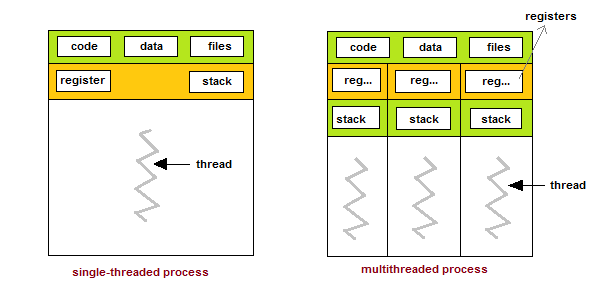





_**Threading with multiprocessor arch. ft. CPython**_

_Process can use multiple core of CPU to run threads in parallel, this is called multiprocessing._

Python is considered as a single threaded programming language, not because we can't create  multiple threads but only one thread will be executing at a moment.
We can create as many threads, but because of GIL in python interepreter it will not allow the thread to execute in parallel. So, technically, python doesn't allow multiprocessing, because of this thing pure python code will not exceed its limits from single core  to multi cores of CPU.

**Python threads are real system threads**
- POSIX threads (pthreads)
- Windows threads
- Fully managed by the host operating system



In [ ]:
from threading import Thread
import time
import os
print(os.getpid())


def exe_func():
    print("thread starts exeucting")
    time.sleep(1)
    print("thread finished executing")


""" Without Threading"""

print( "*"*20 , "Without threading",  "*"*20 )

start_t = time.perf_counter()
exe_func()
exe_func()
exe_func()
end_t = time.perf_counter()

print( f" without threading , ends in {end_t - start_t}")



""" 
    With Threading

here, when t1 starts execute it get hold on ( sleep ) and the program control will then given to t2 ( when CPU become IDLE ) again same and control will be given to t3. ALl these threads
are on sleep and once wake up nearly at same time, since they were put on hold at same moment.

"""

print( "*"*20 , "With threading",  "*"*20 )

thread_lis = []

for _ in range(1000):
    t1 = Thread(target = exe_func)
    t1.start()
    thread_lis.append(t1)

start_t = time.perf_counter()
for t in thread_lis:
    t.join()

end_t = time.perf_counter()
print( f" with threading , ends in {end_t - start_t}")



In [ ]:
"""
    Threading with ThreadPoolExecutor

    1- Its helpful in maintaining large number of thread.
    2- It is helpful in creating a pool of idle thread beforehand and use and resused the threads from the pool. This will helps in overcomming
    the overhead of creating new thread
    3- It also helps in managing thread lifecycle
"""

from concurrent.futures import ThreadPoolExecutor
import time

def exec(second):
    print(f"sleep for {second} (s)")
    time.sleep(second)
    return "executed"

with ThreadPoolExecutor() as executor:
    # submit thread to thread pool
    t1 = executor.submit(exec, 1)
    print(t1.result)

    # submitting multiple thread at once
    results = executor.map(exec, [1,2,1,1])
    for result in results:
        print(result)



So we have seen that, threads works asynchrously whenver they got CPU IDLE they starts executing.
Threading is usefull for `IO bound task`, because we don't let CPU to be IDLE until that IO request gets served.
Threading is usefull in case of - 
- IO bound task
- Network or downloading stuff
- user input tasks / GUI

Although threading is usefull in many scenario but its not a best practice to use multi-threading for heavy computational or CPU bound task. As creating multiple thread have their own overhead during context switching. For that case we must use multi-processing.


## Multi-processing
- A CPU having more than one core, can offers multiprocessing. Which helps in executing the process in parallel.

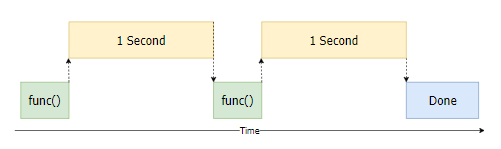
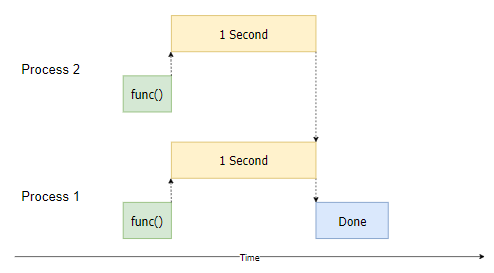

**Multiprocessing ft. Python** - 
Python provides multiprocessing module to create more than one process. Since because of GIL, threads of a process can't executed in multiple cores. With multiprocessing we can create processes and do multiprocessing parallely. Since, each process created has their own python interpreter, which will execute the program. The GIL will only be applied to those threads of of that particular process by its interpreter.


**Note : Daemon**
A daemon process is a background process that is not under the direct control of the user. 


In [32]:
import multiprocessing
import time

def computation():
    i = 10
    ans = 1
    while i:
        ans = ans*i
        i -= 1
    return ans

In [33]:
"""  Without multiprocessing """

start = time.perf_counter()
computation()
computation()
finish = time.perf_counter()
print(f"Without mulitprocessing - { finish - start} (s) ")

Without mulitprocessing - 0.0004386000000522472 (s) 


In [34]:
""" With multiprocessing"""

p1 = multiprocessing.Process(target=computation)
p2 = multiprocessing.Process(target=computation)

start = time.perf_counter()
p1.start()
p2.start()
p1.join()
p2.join()

finish = time.perf_counter()
print(f"With mulitprocessing - { finish - start} (s) ")


With mulitprocessing - 1.6207588999996005 (s) 


In [ ]:
""" 
    With ProcessPoolExecutor


"""
from concurrent.futures import ProcessPoolExecutor

if __name__ == '__main__':
    with ProcessPoolExecutor() as executor:
        p1 = executor.submit(computation)
        print(p1.result())

### [Pickling and Unpickling](https://docs.python.org/3/library/pickle.html#:~:text=%E2%80%9CPickling%E2%80%9D%20is%20the%20process%20whereby,back%20into%20an%20object%20hierarchy.)
The pickle module implements binary protocols for serializing and de-serializing a Python object structure. 

`“Pickling”` is the process whereby a Python object hierarchy is converted into a byte stream, and `“unpickling” `is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

# Object Oriented Programming


## Inheritance
- Inheritance is the mechanism to achieve the re-usability of code as one class(child class) can derive the properties of another class(parent class). 
- It also provides transitivity ie. if class C inherits from P then all the sub-classes of C would also inherit from P.

### Diamond Problem - Multiple inheritence
the problem is that,
```python

class A:
    def get():
        return
class B:

    def get():
        return
class C(A, B):
    pass

c = C()

c.get()

```
, here as per inheritence concept, object of class C have access to all method of class A and B. But we have methods with same ( `get()` ) name in both classes, it creates ambiguity in choosing the function. This situation of ambiguity is called Diamond problem.

## How python solves this problem

**Using Method Resolution Operator ( MRO )**

In case of **Multiple Inheritance** , a given attr is first searched in current class ,  if its not found then search will happended to parent classes in `left to right` fashion.

As in case of above example, method of `A` get executed , since it comes first in searching.




In [59]:
class A:

    def demo(self):
        print("A demo")

class B:
    def demo(self):
        print("B demo")

class C(A, B):
    def demo(self):
        print("C demo")

c = C()
c.demo()

# we can also , view mro of class

print(C.mro())

C demo
[<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class 'object'>]


### Abstraction
- It refers to the act of representing essential features without including the background details or explanations

### Encapsulation
- It is the implementation of Abstraction
- The wrapping up of data and operations into a single unit called class is know as "Encapsulation"

#### Polymorphism
- `poly` : many, `morphos` : forms
- It describes the concept that you can access objects of different types through the same interface. Each type can provide its own independent implementation of this interface(variable name).

**Polymorphism ft. Python**
- Duck typing philosophy - a variable name, can be assigned to different objects in python, since python variables are names or tags that point to memory locations where data is stored.
- Operator Overloading - python `+` is used to add numbers or also used to concatenate list
- Method Overloading and overriding

## [Monkey Patching](https://www.educative.io/answers/what-is-monkey-patching-in-python)

## Getter and Setter in Python
https://realpython.com/python-getter-setter/

In [ ]:
from datetime import date

class Employee:
    def __init__(self, name, birth_date):
        self.name = name
        self.birth_date = birth_date

    @property
    def name(self):
        return self._name

    @name.setter
    def name(self, value):
        self._name = value.upper()

    @property
    def birth_date(self):
        return self._birth_date

    @birth_date.setter
    def birth_date(self, value):
        self._birth_date = date.fromisoformat(value)

### Discriptor in python
Descriptors are an advanced Python feature that allows you to create attributes with attached behaviors in your classes. To create a descriptor, you need to use the descriptor protocol, especially the .__get__() and .__set__() special methods.
